### **NAVIE BAYES**

# **1.Gaussian Navie Bayes**

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/spam.csv"

# Read the CSV file
df = pd.read_csv(file_path, encoding='latin-1')[['v1', 'v2']]
df.columns=['label','Text']
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()



Mounted at /content/drive


,label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [2]:

# Feature Engineering: Extract Numerical Features
df['text_length'] = df['Text'].apply(len)
df['num_words'] = df['Text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['Text'].apply(lambda x: sum(c.isdigit() for c in x))

# Encode labels (ham = 0, spam = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Define features and target
X = df[['text_length', 'num_words', 'num_digits']]
y = df['label']

# Split Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Gaussian Naive Bayes Classifier Performance")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))


Gaussian Naive Bayes Classifier Performance
Confusion Matrix:
 [[953  12]
 [ 10 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9802690582959641


# **2.Multinomial Navie Byes**

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Convert text data into word count vectors
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['Text'])

# Convert counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()  # it will calculate frequency of words
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['label'], test_size=0.2, random_state=42
)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred_mnb = mnb.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_mnb)
print("Accuracy:", accuracy)


Accuracy: 0.968609865470852


# **3.Bernoulli Navie Bayes(For Bonary Features )**

In [5]:

#convert text into binary presence/absence of important words
important_words=['free','win','offer','money','urgent']
for word in important_words:
    df[word]=df['Text'].apply(lambda x: 1 if word in x.lower() else 0)


#define features and target
x=df[important_words]
y=df['label']


#split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#Train Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print("Bernoulli Naive Bayes Classifier Performance:")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_bnb))
print("Classification Report:\n",classification_report(y_test,y_pred_bnb))
print("Accuracy:",accuracy_score(y_test,y_pred_bnb))

Bernoulli Naive Bayes Classifier Performance:
Confusion Matrix:
 [[929  36]
 [ 81  69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115

Accuracy: 0.895067264573991


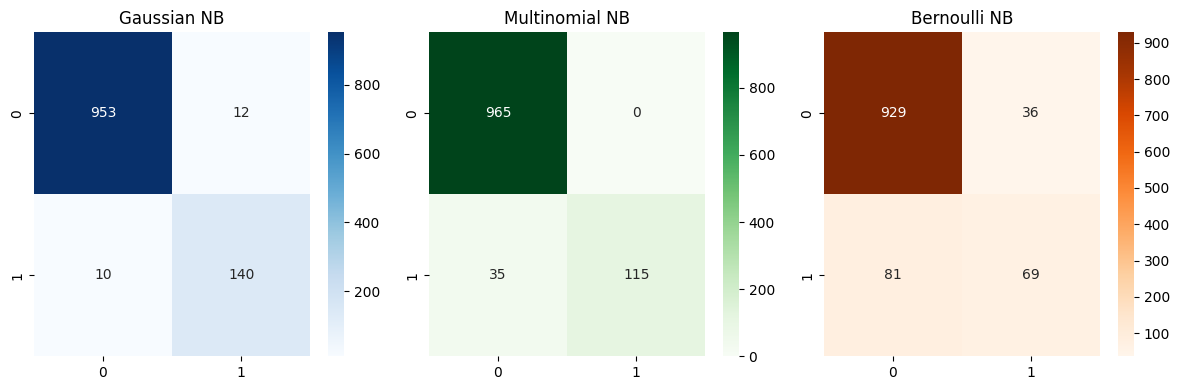

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,fmt='d',cmap='Blues')
plt.title('Gaussian NB')
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test,y_pred_mnb),annot=True,fmt='d',cmap='Greens')
plt.title('Multinomial NB')
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test,y_pred_bnb),annot=True,fmt='d',cmap='Oranges')
plt.title('Bernoulli NB')
plt.tight_layout()
plt.show()

# **ACTIVITY**

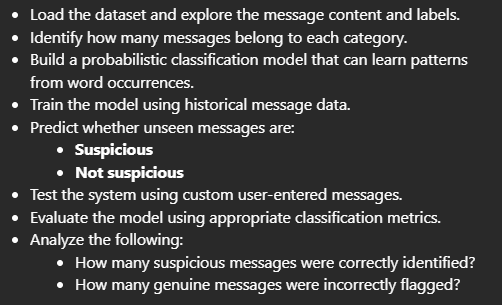

In [7]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/spam.csv"

# Read the CSV file
df= pd.read_csv(file_path, encoding='latin-1')[['v1', 'v2']]

df.columns = ['label', 'message']

print("Dataset shape:", df.shape)
print("\nSample messages:")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (5572, 2)

Sample messages:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [8]:
#Q2. Identify how many messages belong to each category
label_counts = df['label'].value_counts()

print("Message count per category:")
print(label_counts)


Message count per category:
label
ham     4825
spam     747
Name: count, dtype: int64


In [9]:
#Q3. Build a probabilistic classification model (word co-occurrences)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

print("Feature matrix shape:", X.shape)


Feature matrix shape: (5572, 8672)


In [10]:
#Q4. Train the model using historical message data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = MultinomialNB()
model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


In [11]:
#Q5. Predict whether unseen messages are suspicious or not
y_pred = model.predict(X_test)

print("Prediction completed on test data")


Prediction completed on test data


In [12]:
#Q6. Test the system using custom user-entered messages
custom_messages = [
    "Congratulations! You won a free mobile, claim now",
    "Hey, are you coming to college tomorrow?"
]

custom_vec = vectorizer.transform(custom_messages)
predictions = model.predict(custom_vec)

for msg, pred in zip(custom_messages, predictions):
    print(f"Message: {msg}")
    print(f"Prediction: {pred}")
    print("-" * 50)


Message: Congratulations! You won a free mobile, claim now
Prediction: spam
--------------------------------------------------
Message: Hey, are you coming to college tomorrow?
Prediction: ham
--------------------------------------------------


In [13]:
#Q7. Evaluate the model using classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')

print("Model Evaluation Metrics:")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)


Model Evaluation Metrics:
Accuracy : 0.97847533632287
Precision: 0.9144736842105263
Recall   : 0.9266666666666666


In [14]:
#Q8. Analyze misclassifications
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[952  13]
 [ 11 139]]


In [15]:
#Q9. Required analysis answers
correct_spam_identified = cm[1][1]   # True Positives
genuine_flagged_wrong = cm[0][1]     # False Positives

print("Correctly identified suspicious (spam) messages:", correct_spam_identified)
print("Genuine messages incorrectly flagged as suspicious:", genuine_flagged_wrong)


Correctly identified suspicious (spam) messages: 139
Genuine messages incorrectly flagged as suspicious: 13
